# **How to handle imbalanced datasets**


### **Install imbalanced-learn**

### ! pip install -U imbalanced-learn

### **Read data**

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/hcv_classification.csv', index_col=False)

In [8]:
df.shape

(578, 882)

## Test check on SMOTE 

In [9]:
test_df=df.iloc[400:420,:]
test_df['Activity'].value_counts()

active      12
inactive     8
Name: Activity, dtype: int64

In [5]:

test_df.head(2)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
400,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
401,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active


In [14]:
print(np.unique(test_df['Activity']))


['active' 'inactive']


In [10]:
import numpy as np
test_y,count= np.unique(test_df['Activity'],return_counts=True)
print(test_y,count)


['active' 'inactive'] [12  8]


In [15]:
res=[ {i:k} for i,k in zip(test_y,count)]
    #res=[i:k for i,k in test_y]
res

[{'active': 12}, {'inactive': 8}]

In [67]:
test_df[test_df['Activity']=='inactive']

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
414,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
415,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
416,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
417,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
418,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
419,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


In [16]:
y=test_df['Activity']

In [17]:
x=test_df.iloc[:,:-1]

In [18]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.4, random_state=0)
x_train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
404,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
402,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
405,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
409,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
407,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
416,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
411,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
403,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
400,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train.ravel()

array(['active', 'active', 'active', 'inactive', 'active', 'active',
       'inactive', 'active', 'active', 'active', 'inactive', 'inactive'],
      dtype=object)

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2,k_neighbors=3)

sm


SMOTE(k_neighbors=3, random_state=2)

In [21]:
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

In [23]:
resl=list(zip(y_train,y_train_s))
resl

[('active', 'active'),
 ('active', 'active'),
 ('active', 'active'),
 ('inactive', 'inactive'),
 ('active', 'active'),
 ('active', 'active'),
 ('inactive', 'inactive'),
 ('active', 'active'),
 ('active', 'active'),
 ('active', 'active'),
 ('inactive', 'inactive'),
 ('inactive', 'inactive')]

In [3]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

### **Class distribution**

In [5]:
y.value_counts()

active      412
inactive    166
Name: Activity, dtype: int64

<AxesSubplot:ylabel='Activity'>

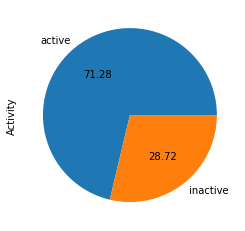

In [6]:
# Show pie plot
y.value_counts().plot.pie(autopct='%.2f')

### **Random Undersampling**

``'not minority'`` = resample all classes but the minority class

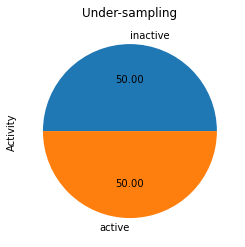

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [11]:
# Class distribution
y_res.value_counts()

inactive    166
active      166
Name: Activity, dtype: int64

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



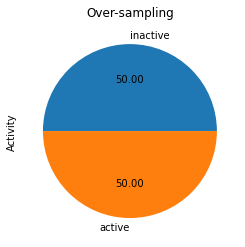

In [12]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [13]:
y_res.value_counts()

inactive    412
active      412
Name: Activity, dtype: int64

# Intuition: Disease Screening Example

Let’s say your client is a leading research hospital, and they’ve asked you to train a model for detecting a disease based on biological inputs collected from patients.

But here’s the catch… the disease is relatively rare; it occurs in only 8% of patients who are screened.

Now, before you even start, do you see how the problem might break? Imagine if you didn’t bother training a model at all. Instead, what if you just wrote a single line of code that always predicts ‘No Disease?’

In [3]:
import pandas as pd
import numpy as np
 
# Read dataset
df = pd.read_csv('balance-scale.data', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
# Count of each classPython

df['balance'].value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

In [5]:
# Transform into binary classification
df['balance'] = [1 if b=='B' else 0 for b in df.balance]
 
df['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

In [2]:
# df['balance'].value_counts(normalize=True)*100

(49/(49+576))*100

7.84

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

In [21]:
# How's the accuracy?
print( accuracy_score(pred_y_0, y) )

0.9216


In [22]:
# Should we be excited?
print( np.unique( pred_y_0 ) )

[0]


In [23]:
from sklearn.utils import resample


In [24]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()

0    576
1    576
Name: balance, dtype: int64

In [25]:
# Separate input features (X) and target variable (y)
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )

[0 1]
0.5147569444444444


In [26]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()

0    49
1    49
Name: balance, dtype: int64

In [27]:
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )

[0 1]
0.5612244897959183


## Apply SMOTE Synthetic Minority Oversampling Technique

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2,k_neighbors=2)

y = df.balance
X = df.drop('balance', axis=1)

x_train_s, y_train_s = sm.fit_resample(X, y.ravel())

# Train model
clf_3 = LogisticRegression().fit(x_train_s, y_train_s)
 
# Predict on training set
pred_y_3 = clf_3.predict(x_train_s)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_train_s, pred_y_3) )

[0 1]
0.5894097222222222


In [29]:
from sklearn.metrics import roc_auc_score


In [30]:
# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5] # Example

[0.4515319725656915,
 0.4872612448005647,
 0.4723896085365283,
 0.4701461062224983,
 0.5876602955877983]

In [31]:

print( roc_auc_score(y, prob_y_2) )

0.5651811745106206


In [32]:
from sklearn.svm import SVC


In [34]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

[0 1]
0.688
0.46947633219954643


In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

[0 1]
0.9984
1.0


# Happy Learning